In [2]:
# setup
import pandas as pd
import os 
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier


# Loading Data

In [3]:
df = pd.read_csv('data_multiple_sclerosis.csv')

In [5]:
df

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,268,2,31,8.0,3,1,9.0,2,0,0,0,0,0,0,0,0,0,NaN,NaN,2
269,269,1,21,15.0,3,3,5.0,2,1,0,0,0,0,0,0,0,1,NaN,NaN,2
270,270,2,19,12.0,3,3,13.0,2,0,1,1,1,0,0,0,0,1,NaN,NaN,2
271,271,2,32,15.0,3,3,15.0,2,1,1,1,1,0,1,1,1,0,NaN,NaN,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               273 non-null    int64  
 1   Gender                   273 non-null    int64  
 2   Age                      273 non-null    int64  
 3   Schooling                272 non-null    float64
 4   Breastfeeding            273 non-null    int64  
 5   Varicella                273 non-null    int64  
 6   Initial_Symptom          272 non-null    float64
 7   Mono_or_Polysymptomatic  273 non-null    int64  
 8   Oligoclonal_Bands        273 non-null    int64  
 9   LLSSEP                   273 non-null    int64  
 10  ULSSEP                   273 non-null    int64  
 11  VEP                      273 non-null    int64  
 12  BAEP                     273 non-null    int64  
 13  Periventricular_MRI      273 non-null    int64  
 14  Cortical_MRI             2

In [7]:
df.describe()

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
count,273.000000,273.000000,273.000000,272.000000,273.000000,273.000000,272.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,125.000000,125.00000,273.000000
mean,136.000000,1.615385,34.062271,15.176471,1.831502,1.710623,6.430147,1.725275,0.358974,0.424908,0.369963,0.307692,0.065934,0.505495,0.432234,0.293040,0.315018,1.360000,1.44800,1.542125
std,78.952517,0.487398,11.114369,4.244175,0.874998,0.732991,4.222009,0.494066,0.558426,0.495237,0.483681,0.462386,0.248623,0.500888,0.496296,0.455993,0.465376,0.587504,0.65323,0.499137
min,0.000000,1.000000,15.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000
25%,68.000000,1.000000,25.000000,12.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000
50%,136.000000,2.000000,33.000000,15.000000,2.000000,2.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,2.000000
75%,204.000000,2.000000,40.000000,20.000000,3.000000,2.000000,9.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.00000,2.000000
max,272.000000,2.000000,77.000000,25.000000,3.000000,3.000000,15.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.00000,2.000000


In [8]:
df.isna().sum()

Unnamed: 0                   0
Gender                       0
Age                          0
Schooling                    1
Breastfeeding                0
Varicella                    0
Initial_Symptom              1
Mono_or_Polysymptomatic      0
Oligoclonal_Bands            0
LLSSEP                       0
ULSSEP                       0
VEP                          0
BAEP                         0
Periventricular_MRI          0
Cortical_MRI                 0
Infratentorial_MRI           0
Spinal_Cord_MRI              0
Initial_EDSS               148
Final_EDSS                 148
group                        0
dtype: int64

In [9]:
df.drop(['Unnamed: 0','Initial_EDSS', 'Final_EDSS'], axis =1, inplace = True)
df.dropna(inplace= True)
df.shape

(271, 17)

In [10]:
df.head(5)

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group
0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1
1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,1
2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1
3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1
4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1


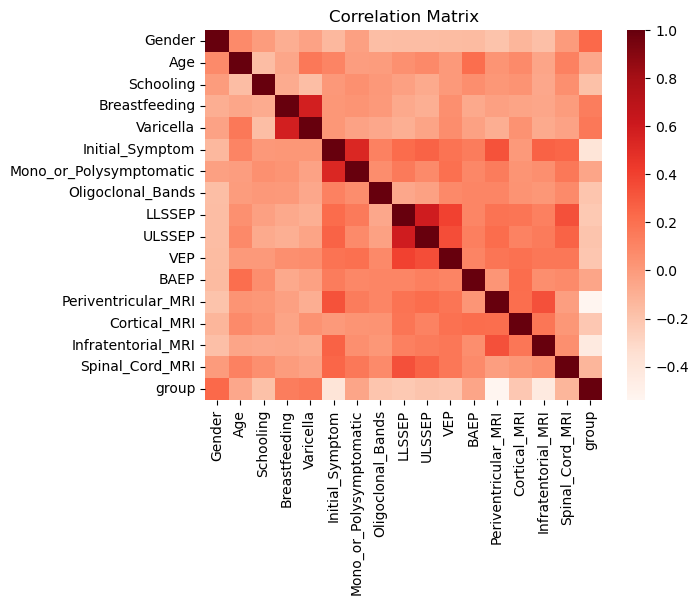

In [11]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap="Reds")
plt.title("Correlation Matrix")
plt.show()

In [12]:
X = df.drop(['group'], axis =1)
y = (df['group'])

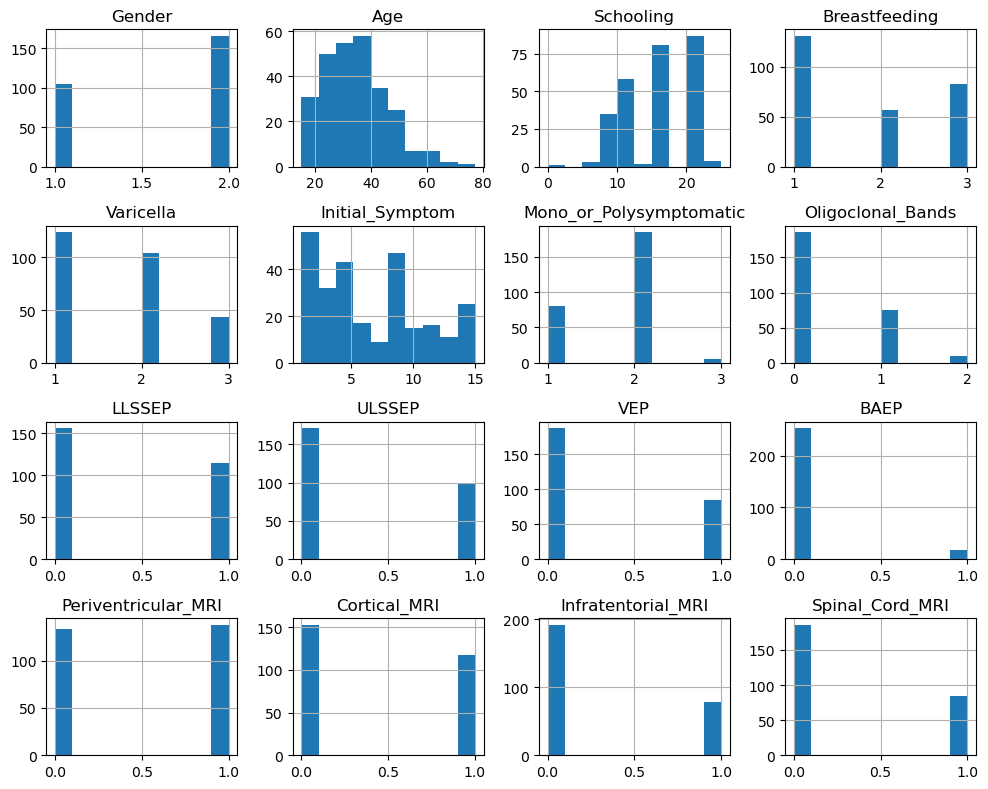

In [13]:
X.hist(bins =10, figsize = (10,8))
plt.tight_layout()
plt.show()

In [14]:
numerical_features = X.columns

# PCA Principal Component Analysis
pca = PCA()
pca.fit(X)

# 
explained_variance_ratios = pca.explained_variance_ratio_

# 
feature_ranking_pca = pd.DataFrame({'Feature': numerical_features, 'Explained Variance Ratio': explained_variance_ratios})
feature_ranking_pca = feature_ranking_pca.sort_values(by='Explained Variance Ratio', ascending=False)

print('Feature Ranking by PCA\n',feature_ranking_pca)


PCA Feature Ranking 
                     Feature  Explained Variance Ratio
0                    Gender                  0.762118
1                       Age                  0.111818
2                 Schooling                  0.104445
3             Breastfeeding                  0.006277
4                 Varicella                  0.003021
5           Initial_Symptom                  0.002090
6   Mono_or_Polysymptomatic                  0.001792
7         Oligoclonal_Bands                  0.001535
8                    LLSSEP                  0.001317
9                    ULSSEP                  0.001127
10                      VEP                  0.001081
11                     BAEP                  0.000961
12      Periventricular_MRI                  0.000854
13             Cortical_MRI                  0.000702
14       Infratentorial_MRI                  0.000546
15          Spinal_Cord_MRI                  0.000316


In [15]:


#  Random Forest classifier
rf = RandomForestClassifier()


rf.fit(X, y)

# Getting the feature importances
feature_importances = rf.feature_importances_

# Ranking the features based on importances
feature_ranking_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_ranking_rf = feature_ranking_rf.sort_values(by='Importance', ascending=False)

print('RFC Feature Ranking \n',feature_ranking_rf.sort_values(by='Importance', ascending=False))
# feature_ranking_rf.plot(kind = 'barh',figsize=(10,5));


RFC Feature Ranking 
                     Feature  Importance
12      Periventricular_MRI    0.164764
5           Initial_Symptom    0.153614
14       Infratentorial_MRI    0.110564
1                       Age    0.108168
2                 Schooling    0.089583
7         Oligoclonal_Bands    0.067061
4                 Varicella    0.052367
3             Breastfeeding    0.046842
0                    Gender    0.034638
13             Cortical_MRI    0.032389
8                    LLSSEP    0.029970
10                      VEP    0.027873
6   Mono_or_Polysymptomatic    0.024707
15          Spinal_Cord_MRI    0.022091
9                    ULSSEP    0.022007
11                     BAEP    0.013361


In [16]:
y.value_counts()

2    146
1    125
Name: group, dtype: int64

In [17]:
X_train , X_test , Y_train , Y_test = train_test_split(X,y, test_size=0.2 , random_state=42)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler. transform(X_test)

<Axes: >

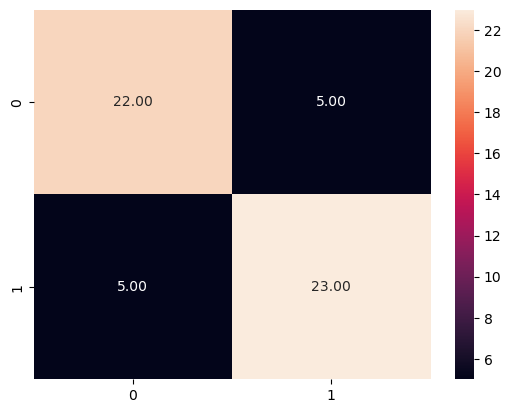

In [19]:
#LogisticRegression

model_lo = LogisticRegression(max_iter=1000)

model_lo.fit(X_train_scaled,Y_train)

lr_score = model_lo.score(X_test_scaled, Y_test)


log = model_lo.predict(X_test_scaled)
model_log = confusion_matrix(Y_test,log)
sns.heatmap(data = model_log,annot = True,fmt='.2f')

In [20]:
# SVM
model_sv = SVC(kernel="linear")

model_sv.fit(X_train,Y_train)

svc_score = model_sv.score(X_test, Y_test)

In [21]:
# BernoulliNB
model_be = BernoulliNB()

model_be.fit(X_train,Y_train)

ber_score = model_be.score(X_test, Y_test)

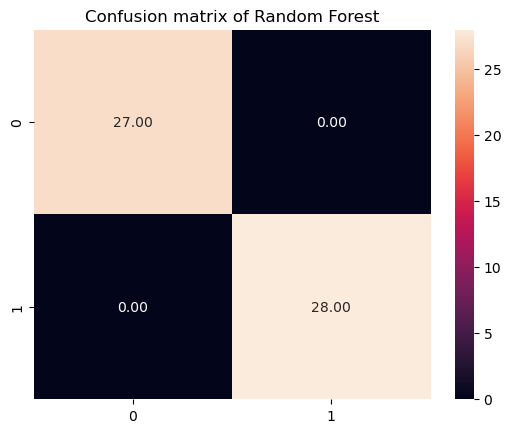

In [22]:
# RFC
model_rf = RandomForestClassifier(n_estimators=175, random_state=23)

model_rf.fit(X_train,Y_train)

rf_score = model_rf.score(X_test, Y_test)


model_rf1 = rf.predict(X_test)
model_cms = confusion_matrix(Y_test,model_rf1)
sns.heatmap(data = model_cms,annot = True,fmt='.2f');
plt.title('Confusion matrix of Random Forest');

In [23]:
score = { 
    'Model_Name' : ['Logistic Regression','SVC','Bernoulli NaiveBayes','Random Forest'],
       'Score'   : [lr_score, svc_score,ber_score,rf_score]
        }

score_df= pd.DataFrame(score)
score_df

,Model_Name,Score
0,Logistic Regression,0.818182
1,SVC,0.800000
2,Bernoulli NaiveBayes,0.836364
3,Random Forest,0.818182
